# PRCP- 1001- RiceLeaf disease detection

### 1. PROBLEM STATEMENT
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
####   CLASSES:
1. Leaf smut
2. Brown spot
3. Bacterial leaf blight

We have to create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot and also to analyze various techniques like Data Augmentation, etc and create a report on that.


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. IMPORTING LIBRARIES

In [2]:
# Importing numpy
import numpy as np

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Importing pathlib
import pathlib

# Importing image_dataset_from_directory from keras
from tensorflow.keras.utils import image_dataset_from_directory

# Importing Sequential from keras
from tensorflow.keras import Sequential

# Importing Rescaling, Conv2D, MaxPooling2D, Flatten, Dense from keras
from tensorflow.keras.layers import InputLayer,Rescaling,Conv2D,MaxPooling2D,Flatten,Dense,Dropout,RandomFlip, RandomRotation, RandomZoom

# Importing SparseCategoricalCrossentropy from keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy

### 3. LOADING DATA

In [3]:
# Assigning directory string to an object
data_dir = "/content/drive/MyDrive/Colab Notebooks/Riceleafdata/data"

# Getting path by pathlib
data_dir = pathlib.Path(data_dir)

In [4]:
# Assigning batch size, image height, image width
batch_size=32
img_height = 256
img_width = 256

In [5]:
# Creating training and testind dataset by image_dataset_from_directory function
train_ds,test_ds=image_dataset_from_directory(data_dir,
  validation_split=0.2,
  subset="both",
  seed=123,
  batch_size=batch_size,
  image_size=(img_height, img_width))

Found 119 files belonging to 3 classes.
Using 96 files for training.
Using 23 files for validation.


### 4. VISULAZING DATA

In [6]:
# Class names for the data
class_names = train_ds.class_names
print(class_names)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


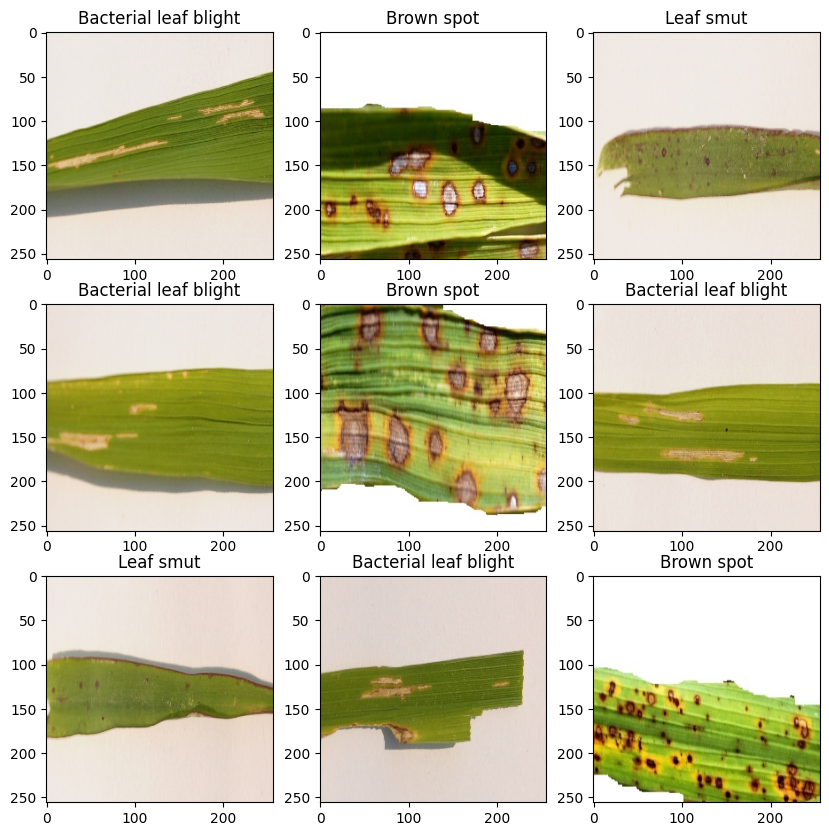

In [7]:
# Visualizing the images in training data by matplotlib.pyplot
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])


In [8]:
# Checking shape of image batch and labels batch
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


### 5. MODEL TRAINING

In [14]:
# Initializing Sequential model from keras
model=Sequential()

# Ading InputLayer to the model
model.add(InputLayer(shape=(256,256,3)))

# Adding Rescaling layer to the model for scaling the image array
model.add(Rescaling(1./255))

# Adding convolution layer to the model
model.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model
model.add(MaxPooling2D())

# Adding convolution layer to the model
model.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model
model.add(MaxPooling2D())

# Adding convolution layer to the model
model.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model
model.add(MaxPooling2D())

# Adding Flatten layer to the model
model.add(Flatten())

# Adding Dense layer to the model
model.add(Dense(128,activation='relu'))

# Adding the output layer to the model
model.add(Dense(3))

In [15]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,307 (14.14 MB)

 Trainable params: 3,706,307 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compiling the model
model.compile(
  optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [17]:
# Fiiting the training data to the model
model.fit(train_ds,
          epochs=200)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.2630 - loss: 1.3506
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.3255 - loss: 1.1335
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.4974 - loss: 0.9917
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.6003 - loss: 0.8514
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.5651 - loss: 0.8191
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.5938 - loss: 0.8090
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 0.7096 - loss: 0.6654
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.6654 - loss: 0.6714
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.7539 - loss: 0.5720
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.7786 - loss: 0.4341
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.8529 - loss: 0.4218
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 

In [18]:
# Evaluating the model by test data
model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7826 - loss: 1.9334


[1.9334352016448975, 0.782608687877655]

In [19]:
# Accuracy score of the model
accuracy=model.evaluate(test_ds)[1]
print('The accuracy for test data is : ',accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7826 - loss: 1.9334
The accuracy for test data is :  0.782608687877655


In [20]:
# Predicting the model by test data
prediction=model.predict(test_ds)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


array([[  0.7905907 ,   0.49299738,   6.937106  ],
       [  6.7354393 ,   7.3871665 ,  -6.7471027 ],
       [  7.12234   ,   3.391618  ,  -2.2510123 ],
       [ 11.422006  ,  11.340383  , -18.283049  ],
       [-10.720415  ,  12.345971  ,  16.926924  ],
       [  8.665013  ,   5.8248425 , -10.402493  ],
       [  6.2836895 ,   8.070569  ,  -6.6797633 ],
       [-14.824354  ,  25.987066  ,  17.998474  ],
       [ 12.616133  ,   8.208655  , -16.647144  ],
       [ -3.586307  ,   9.932822  ,   5.8549347 ],
       [ -8.683479  ,  20.001814  ,   8.3617325 ],
       [ -2.4691877 ,   2.181497  ,   8.713844  ],
       [ -6.0379004 ,  -2.4589086 ,  16.22967   ],
       [ -2.8303487 ,   2.2552223 ,  11.475088  ],
       [-12.11666   ,  14.660703  ,  20.85378   ],
       [-17.059183  ,   8.6010275 ,  28.247969  ],
       [ -5.843763  ,   2.4877245 ,  14.747002  ],
       [ 12.570915  ,  10.737349  , -16.728848  ],
       [ -5.1764226 ,   7.667622  ,   8.219742  ],
       [ -8.846152  ,   4.22128

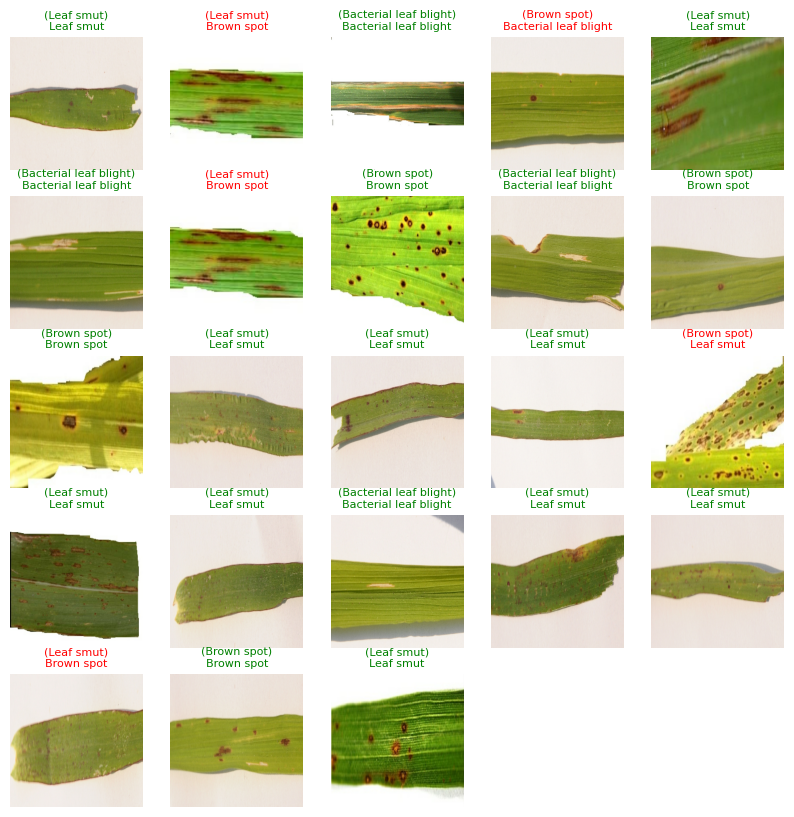

In [21]:
# Visualizing the images in the test data with the prediction is correct or not
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(23):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title( f"({class_names[labels[i]]})\n{class_names[np.argmax(prediction[i])]}",color='green' if labels[i]==np.argmax(prediction[i]) else 'red',fontsize=8)



### 6. DATA AUGMENTATION

In [29]:
# Initialing Sequential model for data augmentation
data_augmentation = Sequential()

# Adding RandomFlip layer to the data_augmentation
data_augmentation.add(RandomFlip("horizontal",input_shape=(img_height,img_width,3)))

# Adding RandomRotation layer to the data_augmentation
data_augmentation.add(RandomRotation(0.1))

# Adding RandomZoom layer to the data_augmentation
data_augmentation.add(RandomZoom(0.1))

In [30]:
# data_augmentation summary
data_augmentation.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 256, 256, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

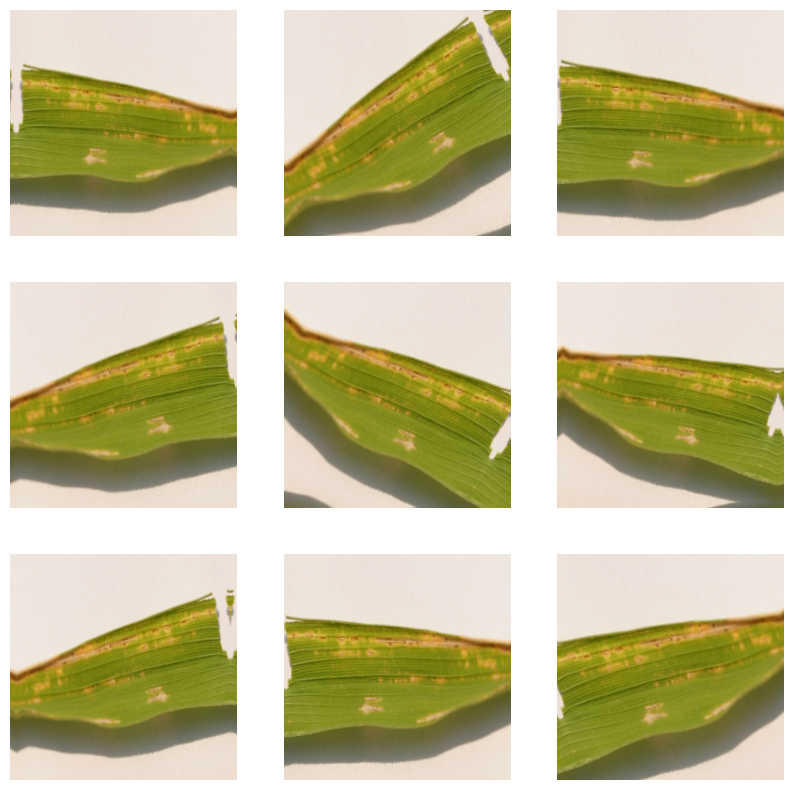

In [31]:
# Visualizing the images in training data after data augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [32]:
# Initialing Sequential model
model_data_aug=Sequential()

# Adding InputLayer to the model_data_aug
model_data_aug.add(InputLayer(shape=(256,256,3)))

# Adding Rescaling layer to the model_data_aug for scaling the images array
model_data_aug.add(Rescaling(1./255))

# Adding data_augmentation
model_data_aug.add(data_augmentation)

# Adding convolution layer to the model_data_aug
model_data_aug.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model_data_aug
model_data_aug.add(MaxPooling2D())

# Adding convolution layer to the model_data_aug
model_data_aug.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model_data_aug
model_data_aug.add(MaxPooling2D())

# Adding convolution layer to the model_data_aug
model_data_aug.add(Conv2D(32,3,activation='relu'))

# Adding pooling layer to the model_data_aug
model_data_aug.add(MaxPooling2D())

# Adding Flatten layer to the model_data_aug
model_data_aug.add(Flatten())

# Adding Dense layer to the model_data_aug
model_data_aug.add(Dense(128,activation='relu'))

# Adding output layer to the model_data_aug
model_data_aug.add(Dense(3))

In [33]:
# Compiling the model_data_aug
model_data_aug.compile(
  optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [34]:
# Fiiting the training data to the model_data_aug
model_data_aug.fit(train_ds,
          epochs=200)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 0.3333 - loss: 1.2427
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.3438 - loss: 1.1053
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 0.3307 - loss: 1.0582
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.4714 - loss: 0.9860
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.6432 - loss: 0.9209
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - accuracy: 0.5781 - loss: 0.8893
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.5677 - loss: 0.8522
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.6107 - loss: 0.7673
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.5951 - loss: 0.7479
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.7174 - loss: 0.7060
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.7018 - loss: 0.6970
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy:

In [35]:
# Evaluating the model_data_aug by test data
model_data_aug.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - accuracy: 0.8696 - loss: 0.4401


[0.4401486814022064, 0.8695651888847351]

In [36]:
# Accuracy score of the model_data_aug
accuracy_data_aug=model_data_aug.evaluate(test_ds)[1]
print('The accuracy for test data is : ',accuracy_data_aug)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8696 - loss: 0.4401
The accuracy for test data is :  0.8695651888847351


In [37]:
# Predicting the model_data_aug by test data
prediction=model_data_aug.predict(test_ds)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


array([[ -4.3887987 ,   4.7113914 ,   4.3033195 ],
       [ -2.6576364 ,   2.5839572 ,  12.240648  ],
       [  2.8010254 ,  -0.35814196,   3.1660337 ],
       [ 17.52854   ,   9.541765  , -25.774517  ],
       [-20.02388   ,  10.08723   ,  29.392347  ],
       [ 11.679325  ,   2.6143203 ,  -7.2747574 ],
       [ -4.667972  ,   3.1390722 ,  15.061511  ],
       [-26.266129  ,  32.43639   ,  15.760309  ],
       [ 11.955407  ,   6.4105544 , -21.053875  ],
       [ -5.569383  ,   4.7914233 ,   1.5933194 ],
       [  1.9669476 ,  34.260902  , -26.421503  ],
       [ -4.2233915 ,   3.7706368 ,   5.2124825 ],
       [ -1.5026841 ,  -0.30682328,  12.429586  ],
       [ -2.327521  ,   1.0189394 ,  10.035931  ],
       [  3.014731  ,  13.784375  , -14.251171  ],
       [-13.866144  ,   2.9929461 ,  32.564434  ],
       [ -4.9413953 ,   2.7967556 ,   9.448639  ],
       [ 28.028826  ,   7.7319717 , -30.75412   ],
       [ -2.9374723 ,   1.4680723 ,   6.4847136 ],
       [ -2.814744  ,   1.81231

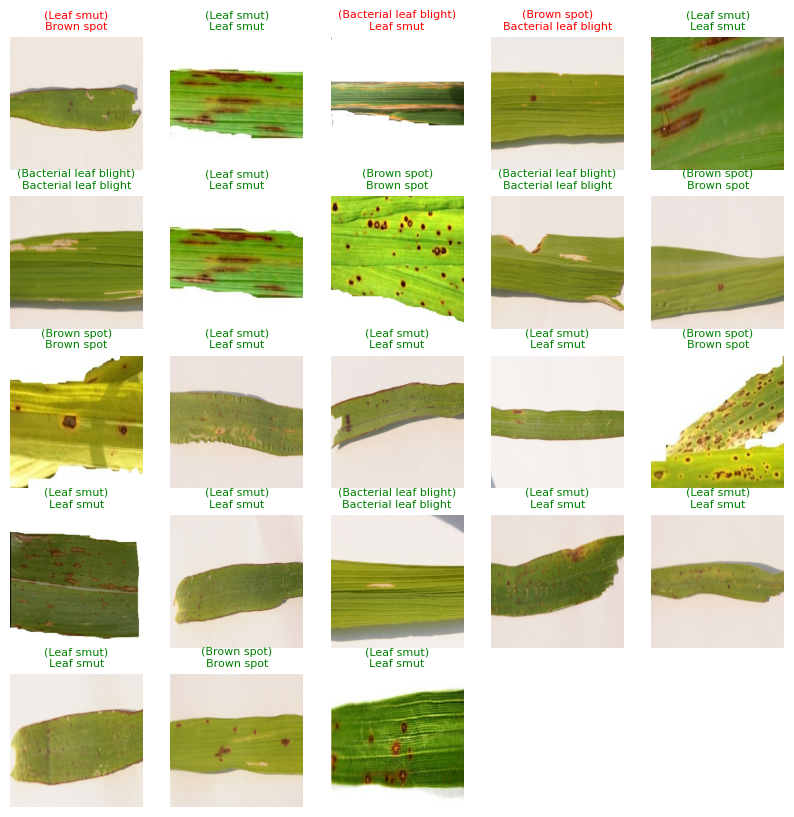

In [38]:
# Visualizing the images in the test data with the prediction is correct or not
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(23):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title( f"({class_names[labels[i]]})\n{class_names[np.argmax(prediction[i])]}",color='green' if labels[i]==np.argmax(prediction[i]) else 'red',fontsize=8)



### 7. REPORT

In [40]:
print('The accuracy of the CNN model without data aumentation is ', accuracy)
print('The accuracy of the CNN model with data augmentation is ', accuracy_data_aug)

The accuracy of the CNN model without data aumentation is  0.782608687877655
The accuracy of the CNN model with data augmentation is  0.8695651888847351


1. The dataset contains the images in three different classes.
2. We splitted the training and testing data with 80% of images for training and 20% of images for testing.
3. Next, we built a sequential model from keras and trained the model with training data.
4. Next to improve performance of the model, we used data augmentation.

Finally, we got the accuracy of the CNN model with data augmentation is greater than the accuracy of the CNN model without data augmentation. So, Data augmentation helps to improve the model performance.


### 8. RISKS


1. There is only 119 images belongs to 3 classes.
2. Each class contains only 40 images.
3. Training the CNN model with less number of images was really challenging.
4. Finding the correct layers for the model was difficult.